# Paper Rock Scissors Recognition

### Import Package

In [0]:
import zipfile,os
import time
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from google.colab import files
from keras.preprocessing import image
%matplotlib inline

print("Tensorflow version:",tf.__version__)

Tensorflow version: 2.2.0


### Load Dataset

In [0]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rock_paper_scissors.zip

local_zip = '/tmp/rock_paper_scissors.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close

--2020-05-18 08:00:19--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rock_paper_scissors.zip’

/tmp/rock_paper_sci 100%[===================>] 307.92M  6.04MB/s    in 63s     

2020-05-18 08:01:23 (4.90 MB/s) - ‘/tmp/rock_paper_scissors.zip’ saved [322873683/322873683]



<bound method ZipFile.close of <zipfile.ZipFile filename='/tmp/rock_paper_scissors.zip' mode='r'>>

### Image Augmentation

In [0]:
startTime = time.time()
train_img = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    vertical_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest',
    validation_split = 0.2
)

validation_img = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    vertical_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest',
    validation_split = 0.2
)

In [0]:
base_dir='/tmp/rockpaperscissors/rps-cv-images/'

train_gen = train_img.flow_from_directory(
    base_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical',
    subset = 'training'
)

validation_gen = validation_img.flow_from_directory(
    base_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical',
    subset = 'validation'
)

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


In [0]:
model = Sequential([
    # This is the first convolution
    Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    # This is the second convolution
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    # This is the third convolution
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    # This is the fourth convolution
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')
])

In [0]:
model.compile(
    loss='categorical_crossentropy',
    optimizer= 'Adam',
    metrics=['accuracy']
)

model.fit(
    train_gen,
    steps_per_epoch  = 50, 
    validation_data  = validation_gen,
    validation_steps = 50,
    epochs = 5, 
    verbose = 2
)

endTime = time.time()

waktu = (endTime - startTime)/60
print(waktu)

Epoch 1/5
 - 99s - loss: 0.8729 - accuracy: 0.5959 - val_loss: 0.3818 - val_accuracy: 0.8609
Epoch 2/5
 - 97s - loss: 0.3228 - accuracy: 0.9000 - val_loss: 0.1131 - val_accuracy: 0.9518
Epoch 3/5
 - 96s - loss: 0.2308 - accuracy: 0.9254 - val_loss: 0.1210 - val_accuracy: 0.9253
Epoch 4/5
 - 95s - loss: 0.1831 - accuracy: 0.9450 - val_loss: 0.1445 - val_accuracy: 0.9569
Epoch 5/5
 - 95s - loss: 0.1425 - accuracy: 0.9459 - val_loss: 0.0429 - val_accuracy: 0.9502
8.047630484898885


### Predict Model Testing

Saving 5VvYOvnkxKc8PIog.png to 5VvYOvnkxKc8PIog.png
5VvYOvnkxKc8PIog.png
[2]
Scissor


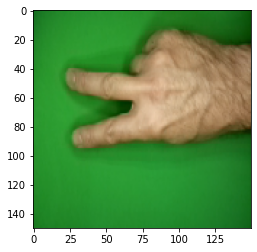

In [0]:
uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  img_class = model.predict_classes(x)
  img_predict = img_class[0]
  pred = []
  pred.append(img_predict)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size = 10)

  print(fn)
  print(pred)
  print(classes)